In [1]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt
import os.path
import numpy as np


2022-10-03 07:47:00.797659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 07:47:01.148227: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-03 07:47:02.028678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/nvidia/hpc_sdk/Linux_x86_64/20.7/compilers/lib::/home/nathan/anaconda3/envs/stable_diffusion/lib/
2022-10-03 07:47:02.028887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not

In [2]:
keras.mixed_precision.set_global_policy("mixed_float16")
model = keras_cv.models.StableDiffusion()


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0


2022-10-03 07:47:04.001357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 07:47:05.961982: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22518 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:1a:00.0, compute capability: 7.5
2022-10-03 07:47:05.964512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22821 MB memory:  -> device: 1, name: NVIDIA TITAN RTX, pci bus id: 0000:68:00.0, compute capability: 7.5


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [3]:
def figname_gen(title):
    figname = f'{title}'
    if os.path.isfile(f'Figures/{figname}.png'): 
        num = str(np.random.randint(1000000, 9999999))
        figname = figname + '_' + num
    return figname

def plot_images(images, title):
    fig = plt.figure(figsize=(20, 20))
    plt.margins(0,0)
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    fig.suptitle(title, y=0.65, fontsize='xx-large', fontweight='bold')
    figname = figname_gen(title)
    fig.savefig(f'Figures/{figname}.png', bbox_inches='tight')
    np.save(f'Arrays/{figname}.png', images)
        
def inference(prompt, **kwargs):
    images = model.text_to_image(prompt, **kwargs)
    plot_images(images, title=prompt)

25/25 [==============================] - 13s 503ms/step


/tmp/ipykernel_5506/2485327280.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(images), i + 1)


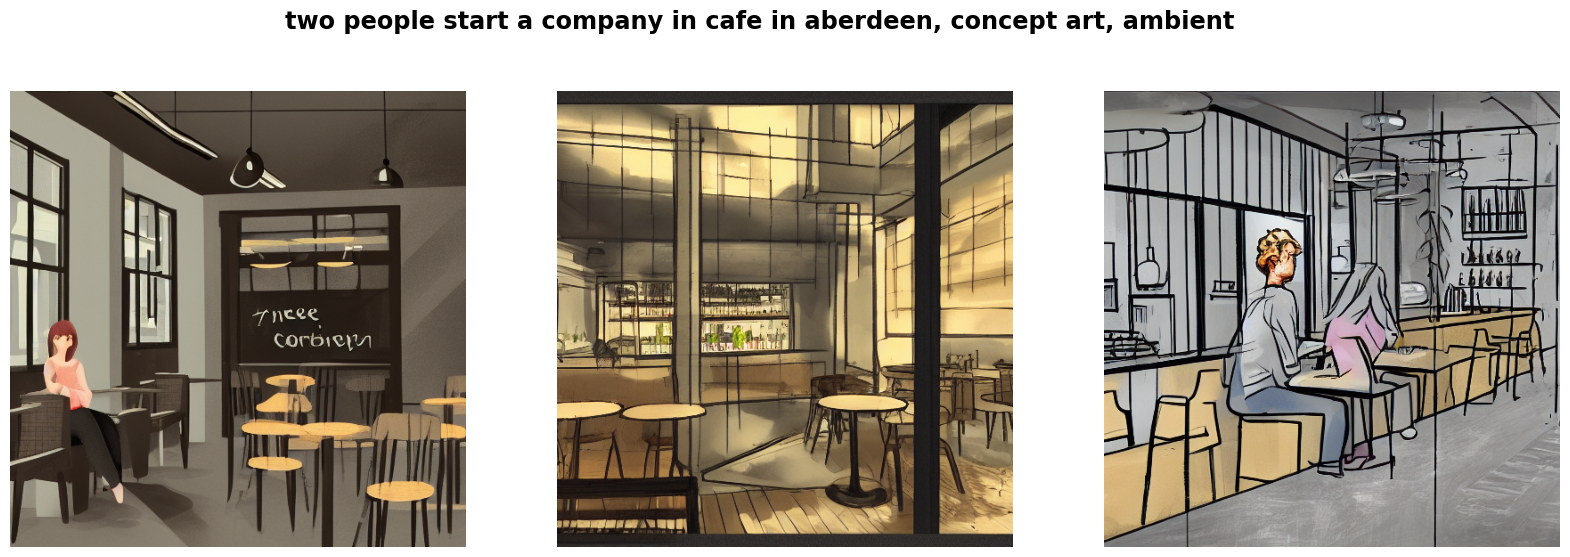

In [37]:
inference("two people start a company in cafe in aberdeen, concept art, ambient", batch_size=3)